In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-paper')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

<img src="kui_frame.png" width="650">

## 1. Activness 데이터 EDA

### 1.1 File Info.
- 일별 Active 유저수 (국가별, 기준별, 플랫폼별 구분)
- 데이터 포멧이 일반적인 포멧과 다름 (대부분 카테고리 변수, 하나의 컬럼만 집계된 결과) 따라서 이용에 주의 필요

- `pd.read_table` 명령어를 통해 데이터를 읽어오고, `head()`, `info()` 함수를 통해 데이터 형상을 확인하도록 하자.

In [2]:
df = pd.read_csv("kuiData.csv")

In [3]:
df.head()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
0,1475852400,all,1,1,1,0,--,9
1,1475852400,all,1,1,1,0,A1,6
2,1475852400,all,1,1,1,0,AF,21
3,1475852400,all,1,1,1,0,AI,1
4,1475852400,all,1,1,1,0,AL,308


In [4]:
df.tail()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
249287,1476543600,view,ALL,ALL,ALL,ALL,VN,6956
249288,1476543600,view,ALL,ALL,ALL,ALL,WS,1
249289,1476543600,view,ALL,ALL,ALL,ALL,YE,193
249290,1476543600,view,ALL,ALL,ALL,ALL,ZA,4846
249291,1476543600,view,ALL,ALL,ALL,ALL,ZM,234


In [6]:
df.shape

(249292, 8)

###  1.2 Column Info.

- datatime: 수집 날짜 (timestamp 형식)
- dataType: 데이터 유형
    - 기존에는 로그인이 active 기준
    - 개선안 후보 1) 문서 보기: **if dataType == 'view'**
    - 개선안 후보 2) 문서 보기 or 수정 or 내보내기: **if dataType == 'all'**
 
- 카테고리 변수
    - deviceTypeNo: 디바이스 유형 (중요x)
    - osTypeNo: OS 유형
    - aswTypeNo: 플랫폼 유형
    - isPaid: 유료 무료 여부
    - if 위 컬럼에서 values가 == 'ALL': 모든 범주변인의 합산
- Note: all and ALL means different status
- countryCode: 국가코드
- userCount: 유저수

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249292 entries, 0 to 249291
Data columns (total 8 columns):
datetime        249292 non-null int64
dataType        249292 non-null object
deviceTypeNo    249292 non-null object
osTypeNo        249292 non-null object
aswTypeNo       249292 non-null object
isPaid          249292 non-null object
countryCode     248394 non-null object
userCount       249292 non-null int64
dtypes: int64(2), object(6)
memory usage: 15.2+ MB


In [8]:
df.isnull().sum()

datetime          0
dataType          0
deviceTypeNo      0
osTypeNo          0
aswTypeNo         0
isPaid            0
countryCode     898
userCount         0
dtype: int64

In [9]:
# type convert
df['datetime'] = pd.to_datetime(df['datetime'], unit='s').dt.date # timestamp to datetime of pd

In [10]:
df.dataType.value_counts()

all     146273
view    103019
Name: dataType, dtype: int64

- all (active 판정기준 1)
    - view or edit or export
- view (active 판정기준 2)
    - view only

In [11]:
df.deviceTypeNo.value_counts()

ALL    110356
1       56382
6       35438
3       34328
2       12788
Name: deviceTypeNo, dtype: int64

- deviceTypeNo
    - 1: Mobile
    - 2: Pad
    - 3: Web
    - 6: PC

In [12]:
df.osTypeNo.value_counts()

ALL    82361
3      49037
1      45650
2      34935
4      23895
5       6960
7       5552
0        854
6         48
Name: osTypeNo, dtype: int64

- osTypeNo code
    - Android = 1
    - iOS = 2
    - Windows = 3
    - Mac = 4

In [29]:
df.aswTypeNo.value_counts()

ALL    110356
1       56382
6       35438
3       34328
2       12788
Name: aswTypeNo, dtype: int64

- aswtypeno
    - 1: App
    - 6: PC
    - 3: Sync
    - 2: Web

In [13]:
df.isPaid.value_counts()

ALL    110448
0      110206
1       28638
Name: isPaid, dtype: int64

- isPaid Code
    - 0: 무료 유저
    - 1: 유료 유저

In [14]:
df.countryCode.value_counts()

ALL    2901
US     2693
KR     2660
JP     2379
GB     2317
MX     2263
ES     2259
IT     2253
BR     2221
DE     2193
       ... 
AS      224
SB      224
FM      200
MF      192
GL      176
YT      128
CF      128
WS      128
CK       64
KI       48
Name: countryCode, Length: 230, dtype: int64

In [15]:
df[df.isnull().any(axis=1)].head()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
161,2016-10-07,all,1,1,1,ALL,NaN,273
396,2016-10-07,all,1,2,1,0,NaN,7
925,2016-10-07,all,1,ALL,ALL,0,NaN,280
1160,2016-10-07,all,2,3,ALL,0,NaN,1
1216,2016-10-07,all,2,3,ALL,ALL,NaN,1


In [46]:
df[df['countryCode'].str.match('[A-Z]') == False]

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
0,2016-10-07,all,1,1,1,0,--,9
274,2016-10-07,all,1,1,ALL,ALL,--,9
488,2016-10-07,all,1,2,ALL,0,--,1
572,2016-10-07,all,1,2,ALL,ALL,--,1
689,2016-10-07,all,1,5,ALL,ALL,--,1
795,2016-10-07,all,1,ALL,1,ALL,--,9
2401,2016-10-07,all,6,3,6,ALL,--,4
2599,2016-10-07,all,6,4,6,0,--,1
2925,2016-10-07,all,6,ALL,ALL,ALL,--,4
3231,2016-10-07,all,ALL,1,ALL,0,--,9


In [18]:
# missing values
df1 = df.replace('--', np.nan).dropna(subset = ['countryCode'])

In [19]:
for cols in df1.loc[:,'deviceTypeNo':'isPaid'].columns:
    print (len(df1[df1[cols].str.match('[A-Z0-9]') == False]))

0
0
0
0


In [73]:
df1.head()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
1,2016-10-07,all,1,1,1,0,A1,6
2,2016-10-07,all,1,1,1,0,AF,21
3,2016-10-07,all,1,1,1,0,AI,1
4,2016-10-07,all,1,1,1,0,AL,308
5,2016-10-07,all,1,1,1,0,AO,184


In [20]:
df1.isnull().sum()

datetime        0
dataType        0
deviceTypeNo    0
osTypeNo        0
aswTypeNo       0
isPaid          0
countryCode     0
userCount       0
dtype: int64

In [21]:
df1.datetime.value_counts().sort_index()

2016-10-07    27000
2016-10-08    26616
2016-10-09    27690
2016-10-10    28060
2016-10-11    28095
2016-10-12    27803
2016-10-13    28322
2016-10-14    27257
2016-10-15    26447
Name: datetime, dtype: int64

### 1.3 dataType 분리후 EDA

- Activeness
    - if dataType == 'all', **View or Edit or Export** 기준
    - if dataType == 'view', **View** 기준
- Cate
    - if values = 'ALL': 모든 범주변인의 합산

- **all and ALL are different vales**

In [23]:
# df all-based active
df_all = df1.query("dataType == 'all'")

# df view-based active
df_view = df1.query("dataType == 'view'")

In [24]:
print(len(df_all))
print(len(df_view))

145117
102173


In [25]:
df_all.head()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
1,2016-10-07,all,1,1,1,0,A1,6
2,2016-10-07,all,1,1,1,0,AF,21
3,2016-10-07,all,1,1,1,0,AI,1
4,2016-10-07,all,1,1,1,0,AL,308
5,2016-10-07,all,1,1,1,0,AO,184


In [26]:
# all base total
df_all_tot = df_all.query("deviceTypeNo == 'ALL' & osTypeNo == 'ALL' & aswTypeNo == 'ALL' & isPaid == 'ALL' & countryCode == 'ALL'")

In [27]:
df_all_tot.head(10)

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
14316,2016-10-07,all,ALL,ALL,ALL,ALL,ALL,897602
41320,2016-10-08,all,ALL,ALL,ALL,ALL,ALL,792150
68748,2016-10-09,all,ALL,ALL,ALL,ALL,ALL,1014554
96845,2016-10-10,all,ALL,ALL,ALL,ALL,ALL,1118078
125108,2016-10-11,all,ALL,ALL,ALL,ALL,ALL,1125967
153329,2016-10-12,all,ALL,ALL,ALL,ALL,ALL,1137472
181640,2016-10-13,all,ALL,ALL,ALL,ALL,ALL,1172697
209694,2016-10-14,all,ALL,ALL,ALL,ALL,ALL,915171
236717,2016-10-15,all,ALL,ALL,ALL,ALL,ALL,777353


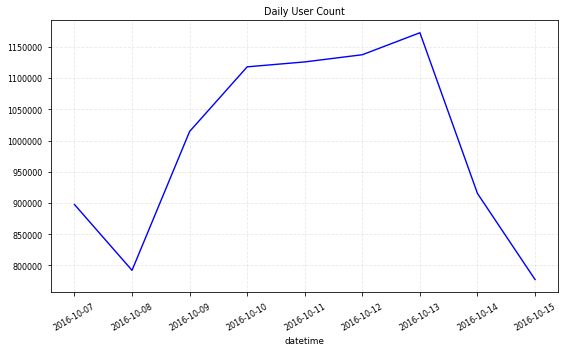

In [28]:
plt.subplots(figsize=(8,5))

df_all_tot.groupby("datetime")['userCount'].sum().plot(rot=30, c='b')

plt.title("Daily User Count")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [29]:
# view base total
df_view_tot = df_view.query("deviceTypeNo == 'ALL' & osTypeNo == 'ALL' & aswTypeNo == 'ALL' & isPaid == 'ALL' & countryCode == 'ALL'")

In [31]:
df_view_tot.head()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
8971,2016-10-07,view,ALL,ALL,ALL,ALL,ALL,784724
36041,2016-10-08,view,ALL,ALL,ALL,ALL,ALL,668074
63238,2016-10-09,view,ALL,ALL,ALL,ALL,ALL,895476
91303,2016-10-10,view,ALL,ALL,ALL,ALL,ALL,1009002
119572,2016-10-11,view,ALL,ALL,ALL,ALL,ALL,1007868


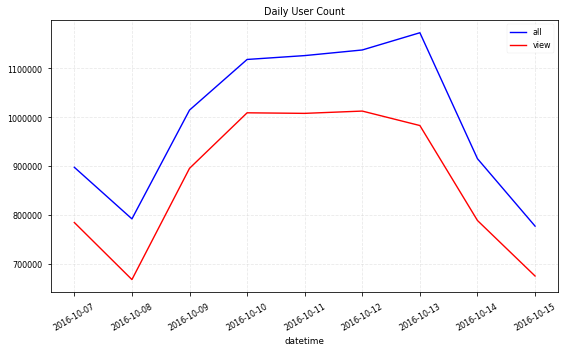

In [32]:
plt.subplots(figsize=(8,5))

df_all_tot.groupby("datetime")['userCount'].sum().plot(rot=30, c='b', label='all')
df_view_tot.groupby("datetime")['userCount'].sum().plot(rot=30, c='r', label='view')

plt.title("Daily User Count")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

In [33]:
# original DAU index
dates_idx = pd.date_range('20161007', periods=9)

# values
dau = pd.Series([1097686, 966350, 1264246, 1388723, 1389716, 1401294, 1367030, 1143068, 1011094], index=dates_idx)

In [34]:
dau

2016-10-07    1097686
2016-10-08     966350
2016-10-09    1264246
2016-10-10    1388723
2016-10-11    1389716
2016-10-12    1401294
2016-10-13    1367030
2016-10-14    1143068
2016-10-15    1011094
Freq: D, dtype: int64

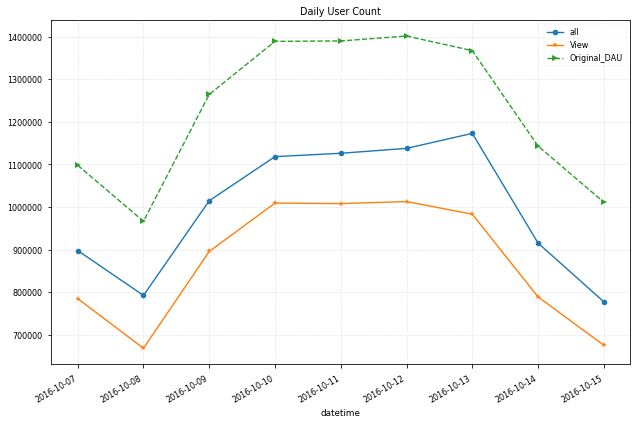

In [35]:
plt.figure(figsize=(9,6))

df_all_tot.groupby("datetime")['userCount'].sum().plot(marker='o', label='all');
df_view_tot.groupby("datetime")['userCount'].sum().plot(marker='*', label='View');
dau.plot(marker='>', linestyle='dashed', label='Original_DAU');

plt.title("Daily User Count")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

### Note

- 원래 DAU 값과 2가지 기준의 값에 큰 GAP 존재 (허수)
- 세 지표의 트렌드는 유사함
- datatype = all 인경우가 activeness 로서 적절할 것으로 판단
    - 기존에서 변화가 보수적
    - edit, export는 누락하는 것은 부적절

In [38]:
df_all.head() # df.query("dataType == 'all'")

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
1,2016-10-07,all,1,1,1,0,A1,6
2,2016-10-07,all,1,1,1,0,AF,21
3,2016-10-07,all,1,1,1,0,AI,1
4,2016-10-07,all,1,1,1,0,AL,308
5,2016-10-07,all,1,1,1,0,AO,184


In [39]:
df_all.shape

(145117, 8)

### 1.4 osTypeNo 기준 데이터탐색

In [40]:
df_all.drop("dataType", axis=1, inplace=True)

In [41]:
df_all.head(10)

,datetime,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
1,2016-10-07,1,1,1,0,A1,6
2,2016-10-07,1,1,1,0,AF,21
3,2016-10-07,1,1,1,0,AI,1
4,2016-10-07,1,1,1,0,AL,308
5,2016-10-07,1,1,1,0,AO,184
6,2016-10-07,1,1,1,0,AR,23123
7,2016-10-07,1,1,1,0,AU,2967
8,2016-10-07,1,1,1,0,AX,1
9,2016-10-07,1,1,1,0,BB,23
10,2016-10-07,1,1,1,0,BE,2202


In [43]:
df_all.osTypeNo.value_counts()

ALL    48069
3      32176
1      23899
2      18317
4      15624
5       3480
7       2888
0        632
6         32
Name: osTypeNo, dtype: int64

- osTypeNo code
    - Android = 1
    - iOS = 2
    - Windows = 3
    - Mac = 4
    - 나머지는 unknown

In [44]:
# 탐색용 함수 생성
def df_by_type(df, devicetype, ostype, aswtype, ispaid, countryCode):

    df = df[(df['deviceTypeNo'] == devicetype) & (df['osTypeNo'] == ostype)  \
            & (df['aswTypeNo'] == aswtype) & (df['isPaid'] == ispaid) & (df['countryCode'] == countryCode)]

    return df

In [45]:
# create four dataframe based on the condition
df_aos = df_by_type(df_all, 'ALL', '1', 'ALL', 'ALL', 'ALL')

df_aos.head()

,datetime,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
12476,2016-10-07,ALL,1,ALL,ALL,ALL,770994
39484,2016-10-08,ALL,1,ALL,ALL,ALL,649334
66816,2016-10-09,ALL,1,ALL,ALL,ALL,845110
94897,2016-10-10,ALL,1,ALL,ALL,ALL,956937
123165,2016-10-11,ALL,1,ALL,ALL,ALL,957161


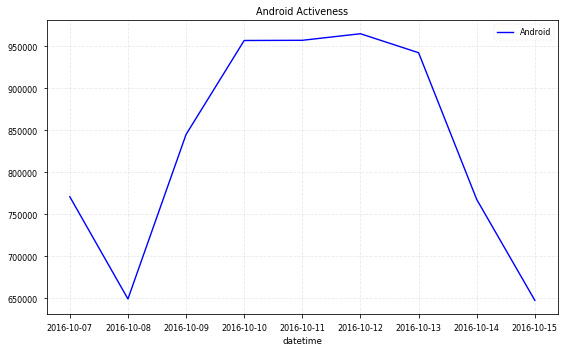

In [46]:
plt.subplots(figsize=(8,5))

df_aos.groupby("datetime").sum()['userCount'].plot(label='Android', c='b');

plt.title("Android Activeness")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

In [47]:
df_ios = df_by_type(df_all, 'ALL', '2', 'ALL', 'ALL', 'ALL')
df_win = df_by_type(df_all, 'ALL', '3', 'ALL', 'ALL', 'ALL')
df_mac = df_by_type(df_all, 'ALL', '4', 'ALL', 'ALL', 'ALL')

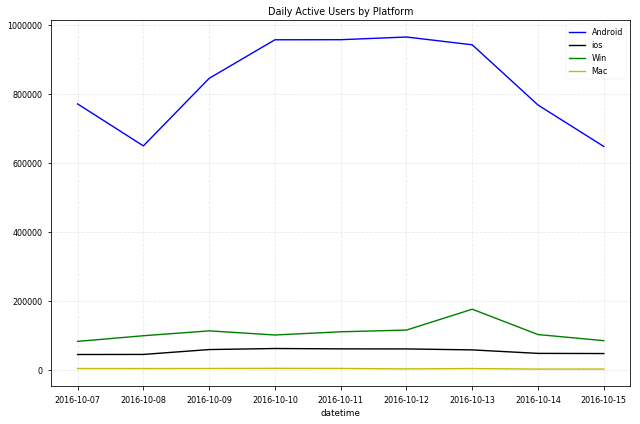

In [48]:
fig = plt.figure(figsize=(9,6))

df_aos.groupby("datetime").sum()['userCount'].plot(label='Android', c='b');
df_ios.groupby("datetime").sum()['userCount'].plot(label='ios', c='k');
df_win.groupby("datetime").sum()['userCount'].plot(label='Win', c='g');
df_mac.groupby("datetime").sum()['userCount'].plot(label='Mac', c='y');

plt.title("Daily Active Users by Platform")
plt.legend()
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

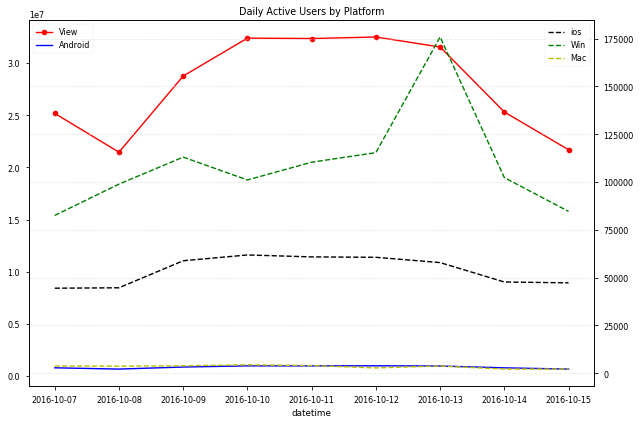

In [50]:
fig = plt.figure(figsize=(9,6))

ax = fig.add_subplot(111)
df_view.groupby("datetime").sum()['userCount'].plot(label='View', ax=ax, marker='o', c='r')
df_aos.groupby("datetime").sum()['userCount'].plot(label='Android', ax=ax, c='b');

ax2 = ax.twinx()
df_ios.groupby("datetime").sum()['userCount'].plot(label='ios', ax=ax2, c='k', linestyle='dashed');
df_win.groupby("datetime").sum()['userCount'].plot(label='Win', ax=ax2, c='g', linestyle='dashed');
df_mac.groupby("datetime").sum()['userCount'].plot(label='Mac', ax=ax2, c='y', linestyle='dashed');

plt.title("Daily Active Users by Platform")
ax.legend(loc=2)
ax2.legend(loc=1)
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

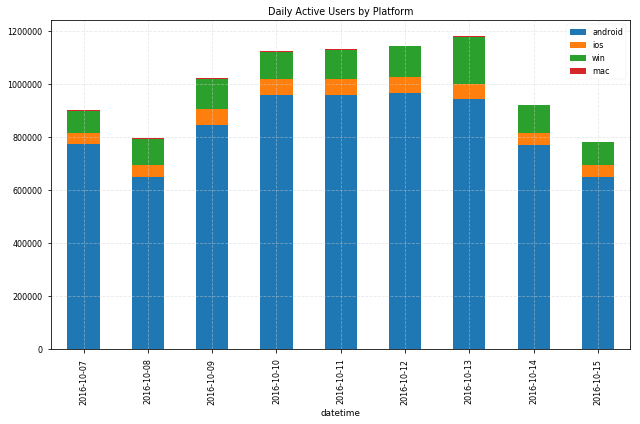

In [51]:
plt.figure()

aos = df_aos.groupby("datetime").sum()['userCount']
ios = df_ios.groupby("datetime").sum()['userCount']
win = df_win.groupby("datetime").sum()['userCount']
mac = df_mac.groupby("datetime").sum()['userCount']

# create a df
plf = pd.concat([aos, ios, win, mac], axis=1)
plf.columns = ['android', 'ios', 'win', 'mac']

# plot
plf.plot(kind='bar', stacked=True, figsize=(9,6));

plt.title("Daily Active Users by Platform")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

### 1.5 결제 유무(isPaid)기준 데이터 탐색

In [52]:
df_all.head()

,datetime,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
1,2016-10-07,1,1,1,0,A1,6
2,2016-10-07,1,1,1,0,AF,21
3,2016-10-07,1,1,1,0,AI,1
4,2016-10-07,1,1,1,0,AL,308
5,2016-10-07,1,1,1,0,AO,184


In [53]:
df_all.isPaid.value_counts()

ALL    64176
0      64056
1      16885
Name: isPaid, dtype: int64

- isPaid code
    - 0: Free
    - 1: Paid

In [54]:
df_free = df_by_type(df_all, 'ALL', 'ALL', 'ALL', '0', 'ALL')
df_paid = df_by_type(df_all, 'ALL', 'ALL', 'ALL', '1', 'ALL')

In [55]:
df_free.head(5)

,datetime,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
14209,2016-10-07,ALL,ALL,ALL,0,ALL,895125
41217,2016-10-08,ALL,ALL,ALL,0,ALL,789819
68641,2016-10-09,ALL,ALL,ALL,0,ALL,1011593
96739,2016-10-10,ALL,ALL,ALL,0,ALL,1114967
124999,2016-10-11,ALL,ALL,ALL,0,ALL,1122786


In [56]:
df_paid.head(5)

,datetime,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
23301,2016-10-07,ALL,ALL,ALL,1,ALL,2477
50195,2016-10-08,ALL,ALL,ALL,1,ALL,2331
77940,2016-10-09,ALL,ALL,ALL,1,ALL,2961
106169,2016-10-10,ALL,ALL,ALL,1,ALL,3111
134404,2016-10-11,ALL,ALL,ALL,1,ALL,3181


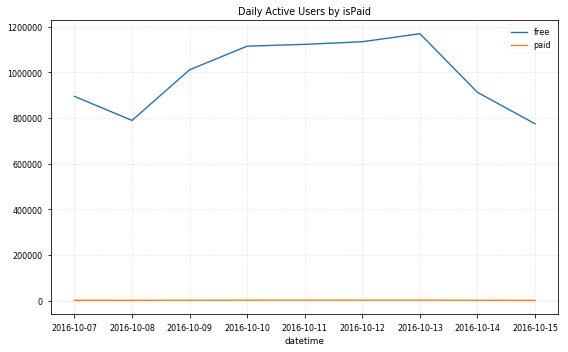

In [57]:
plt.subplots(figsize=(8,5))

df_free.groupby("datetime")['userCount'].sum().plot(label='free');
df_paid.groupby("datetime")['userCount'].sum().plot(label='paid');

plt.title("Daily Active Users by isPaid")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

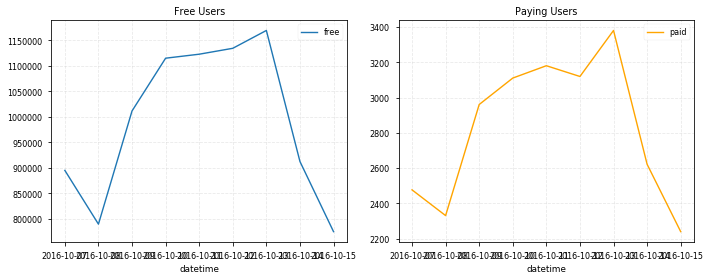

In [58]:
fig, ax = plt.subplots(1, 2)

df_free.groupby("datetime")['userCount'].sum().plot(label='free', ax=ax[0], figsize=(10,4));
ax[0].set_title("Free Users")
ax[0].legend()
ax[0].grid(color='lightgrey', alpha=0.5, linestyle='--')

df_paid.groupby("datetime")['userCount'].sum().plot(label='paid', ax=ax[1], color='orange');
ax[1].set_title("Paying Users")
ax[1].legend()
ax[1].grid(color='lightgrey', alpha=0.5, linestyle='--')

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

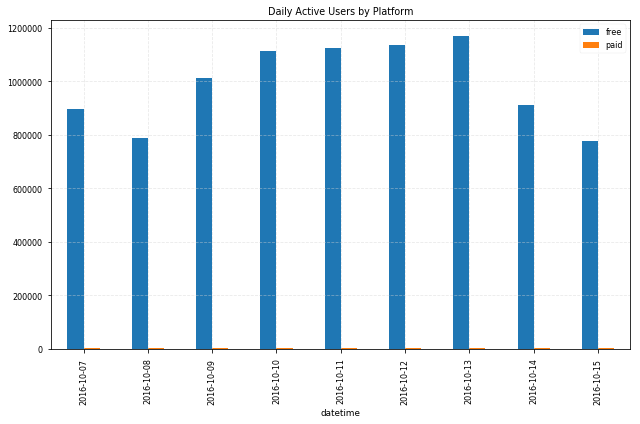

In [60]:
plt.figure()

free = df_free.groupby("datetime")['userCount'].sum()
paid = df_paid.groupby("datetime")['userCount'].sum()

# create a df
plf = pd.concat([free, paid], axis=1)
plf.columns = ['free', 'paid']

# plot
plf.plot(kind='bar', stacked=False, figsize=(9,6));

plt.title("Daily Active Users by Platform")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

### Note

- aswType, deviceType 기준으로 탐색 가능 --> 생략

### 1.6 Cross Category 탐색
- 1) ostype & paid
- 2) aswtype & paid

In [61]:
# df, devicetype, ostype, aswtype, ispaid, countrycd
# android
df_aos_free = df_by_type(df_all, 'ALL', '1', 'ALL', '0', 'ALL')
df_aos_paid = df_by_type(df_all, 'ALL', '1', 'ALL', '1', 'ALL')

#ios
df_ios_free = df_by_type(df_all, 'ALL', '2', 'ALL', '0', 'ALL')
df_ios_paid = df_by_type(df_all, 'ALL', '2', 'ALL', '1', 'ALL')

# pc
df_win_free = df_by_type(df_all, 'ALL', '3', 'ALL', '0', 'ALL')
df_win_paid = df_by_type(df_all, 'ALL', '3', 'ALL', '1', 'ALL')

In [62]:
df_win_free.head()

,datetime,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
22190,2016-10-07,ALL,3,ALL,0,ALL,81544
49076,2016-10-08,ALL,3,ALL,0,ALL,97923
76792,2016-10-09,ALL,3,ALL,0,ALL,111653
105034,2016-10-10,ALL,3,ALL,0,ALL,99763
133262,2016-10-11,ALL,3,ALL,0,ALL,109019


In [63]:
df_win_paid.head()

,datetime,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
4138,2016-10-07,ALL,3,ALL,1,ALL,992
31285,2016-10-08,ALL,3,ALL,1,ALL,999
58270,2016-10-09,ALL,3,ALL,1,ALL,1372
86209,2016-10-10,ALL,3,ALL,1,ALL,1321
114489,2016-10-11,ALL,3,ALL,1,ALL,1343


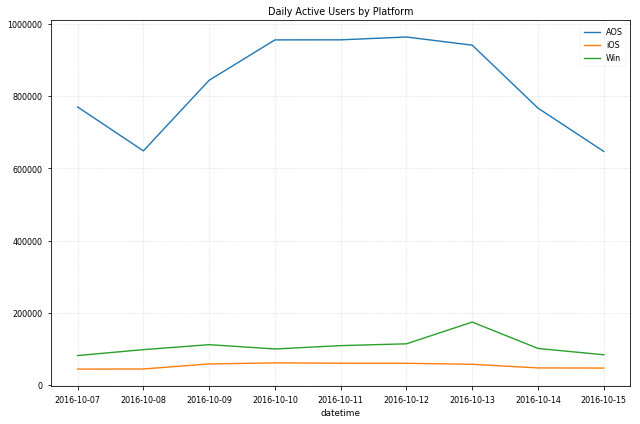

In [153]:
fig = plt.figure(figsize=(9,6))

df_aos_free.groupby("datetime")['userCount'].sum().plot(label='AOS');
df_ios_free.groupby("datetime")['userCount'].sum().plot(label='iOS');
df_win_free.groupby("datetime")['userCount'].sum().plot(label='Win');

plt.title("Daily Active Users by Platform")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

<Figure size 648x432 with 0 Axes>

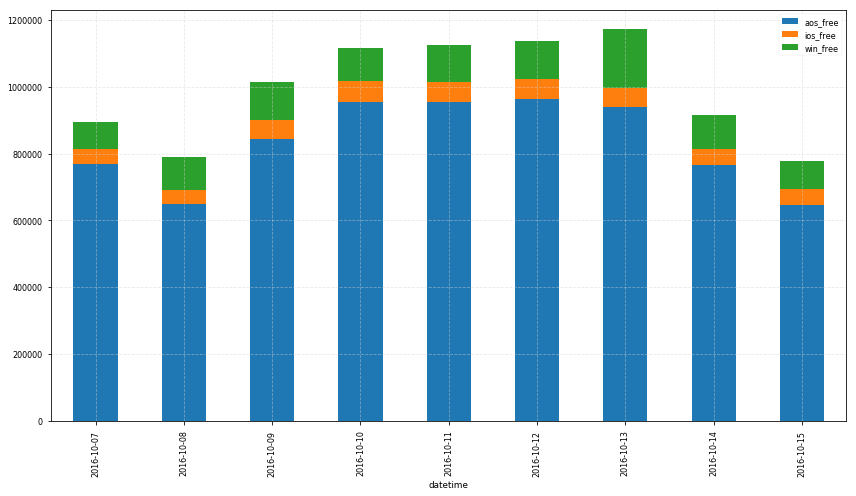

In [64]:
plt.figure(figsize=(9,6))

aos_free = df_aos_free.groupby("datetime")['userCount'].sum()
ios_free = df_ios_free.groupby("datetime")['userCount'].sum()
win_free = df_win_free.groupby("datetime")['userCount'].sum()

# create a df
plf = pd.concat([aos_free, ios_free, win_free], axis=1)
plf.columns = ['aos_free', 'ios_free', 'win_free']

# plot
plf.plot(kind='bar', stacked=True, figsize=(12,7));

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

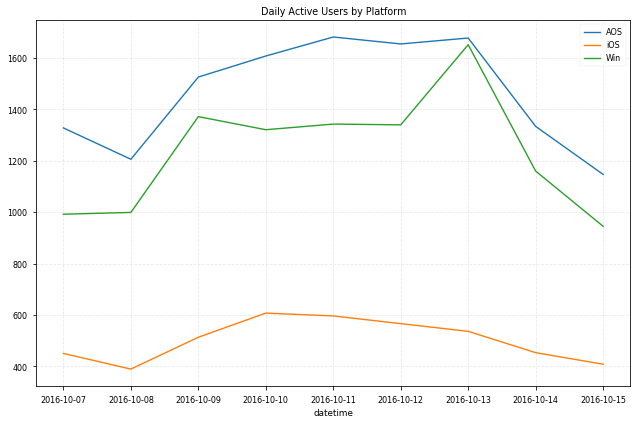

In [65]:
fig = plt.figure(figsize=(9,6))

df_aos_paid.groupby("datetime")['userCount'].sum().plot(label='AOS');
df_ios_paid.groupby("datetime")['userCount'].sum().plot(label='iOS');
df_win_paid.groupby("datetime")['userCount'].sum().plot(label='Win');

plt.title("Daily Active Users by Platform")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

<Figure size 648x432 with 0 Axes>

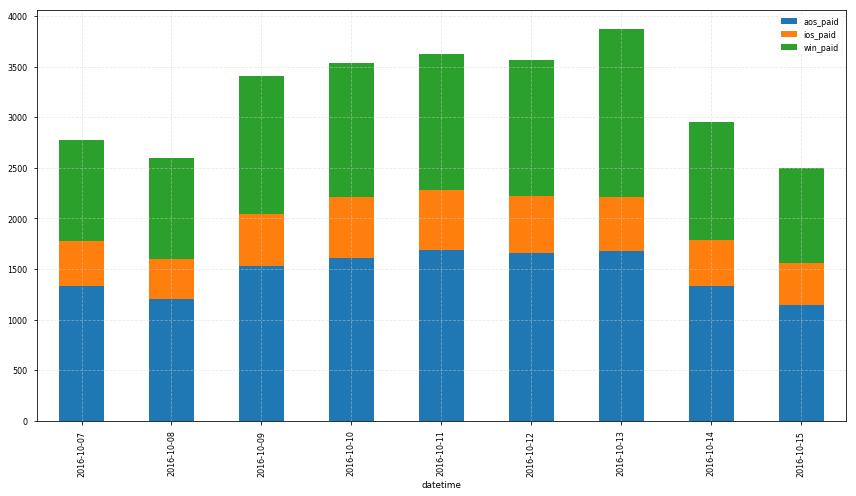

In [66]:
plt.figure(figsize=(9,6))

aos_paid = df_aos_paid.groupby("datetime")['userCount'].sum()
ios_paid = df_ios_paid.groupby("datetime")['userCount'].sum()
win_paid = df_win_paid.groupby("datetime")['userCount'].sum()

# create a df
plf = pd.concat([aos_paid, ios_paid, win_paid], axis=1)
plf.columns = ['aos_paid', 'ios_paid', 'win_paid']

# plot
plf.plot(kind='bar', stacked=True, figsize=(12,7));

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

### 1.7 국가별 Activeness 탐색

In [67]:
# 상위 Top country
df_all.countryCode.value_counts()

ALL    1609
KR     1513
US     1509
JP     1348
GB     1329
IT     1283
MX     1278
ES     1276
BR     1268
AU     1257
       ... 
AS      112
SB      112
FM      106
MF       96
GL       88
YT       64
CF       64
WS       64
CK       32
KI       32
Name: countryCode, Length: 229, dtype: int64

In [68]:
df_kr = df_by_type(df_all, 'ALL', 'ALL', 'ALL', 'ALL', 'KR')
df_us = df_by_type(df_all, 'ALL', 'ALL', 'ALL', 'ALL', 'US')
df_jp = df_by_type(df_all, 'ALL', 'ALL', 'ALL', 'ALL', 'JP')
df_gb = df_by_type(df_all, 'ALL', 'ALL', 'ALL', 'ALL', 'GB')
df_it = df_by_type(df_all, 'ALL', 'ALL', 'ALL', 'ALL', 'IT')
df_mx = df_by_type(df_all, 'ALL', 'ALL', 'ALL', 'ALL', 'MX')
df_es = df_by_type(df_all, 'ALL', 'ALL', 'ALL', 'ALL', 'ES')
df_br = df_by_type(df_all, 'ALL', 'ALL', 'ALL', 'ALL', 'BR')

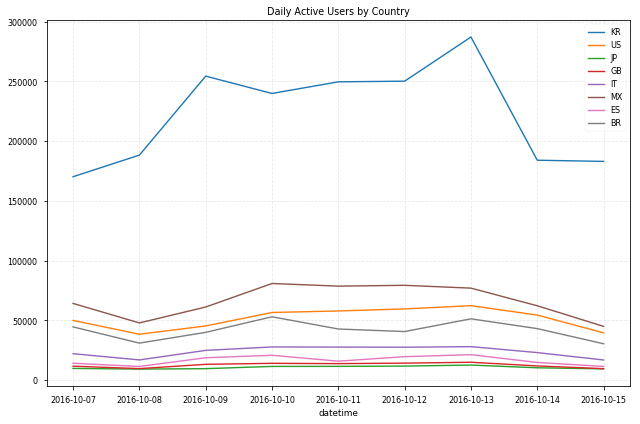

In [69]:
fig = plt.figure(figsize=(9,6))

df_kr.groupby("datetime")['userCount'].sum().plot(label='KR');
df_us.groupby("datetime")['userCount'].sum().plot(label='US');
df_jp.groupby("datetime")['userCount'].sum().plot(label='JP');
df_gb.groupby("datetime")['userCount'].sum().plot(label='GB');
df_it.groupby("datetime")['userCount'].sum().plot(label='IT');
df_mx.groupby("datetime")['userCount'].sum().plot(label='MX');
df_es.groupby("datetime")['userCount'].sum().plot(label='ES');
df_br.groupby("datetime")['userCount'].sum().plot(label='BR');

plt.title("Daily Active Users by Country")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

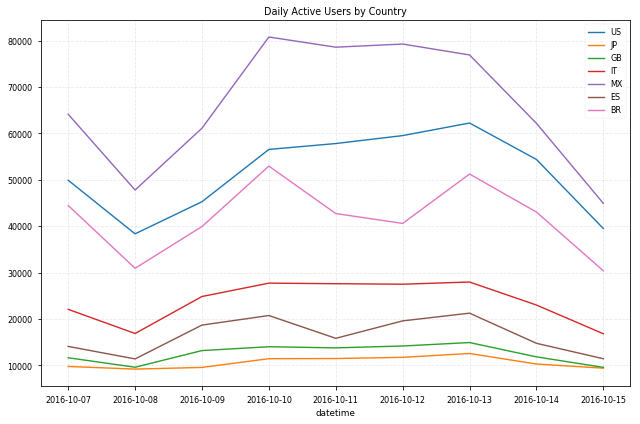

In [70]:
# zoom-in
fig = plt.figure(figsize=(9,6))

#df_kr.groupby("datetime")['userCount'].sum().plot(label='KR');
df_us.groupby("datetime")['userCount'].sum().plot(label='US');
df_jp.groupby("datetime")['userCount'].sum().plot(label='JP');
df_gb.groupby("datetime")['userCount'].sum().plot(label='GB');
df_it.groupby("datetime")['userCount'].sum().plot(label='IT');
df_mx.groupby("datetime")['userCount'].sum().plot(label='MX');
df_es.groupby("datetime")['userCount'].sum().plot(label='ES');
df_br.groupby("datetime")['userCount'].sum().plot(label='BR');

plt.title("Daily Active Users by Country")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

### 1.8 국가별 유료 유저 비중

In [71]:
df_paid_rate = df_all.query("countryCode == 'KR' or countryCode == 'US' or countryCode == 'JP' or countryCode == 'MX' or countryCode == 'BR'")\
                     .query("isPaid != 'ALL' and deviceTypeNo == 'ALL' and osTypeNo == 'ALL' and aswTypeNo == 'ALL'")

df_paid_rate.head(10)

,datetime,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
5144,2016-10-07,ALL,ALL,ALL,0,BR,44430
5167,2016-10-07,ALL,ALL,ALL,0,JP,9592
5168,2016-10-07,ALL,ALL,ALL,0,KR,169306
5219,2016-10-07,ALL,ALL,ALL,1,MX,30
5230,2016-10-07,ALL,ALL,ALL,1,US,561
14287,2016-10-07,ALL,ALL,ALL,1,BR,42
14298,2016-10-07,ALL,ALL,ALL,1,JP,152
14299,2016-10-07,ALL,ALL,ALL,1,KR,882
23273,2016-10-07,ALL,ALL,ALL,0,MX,64116
23294,2016-10-07,ALL,ALL,ALL,0,US,49355


In [72]:
df_paid_rate1 = df_paid_rate.groupby(['countryCode', 'isPaid'])['userCount'].sum().unstack().reset_index()
df_paid_rate1.columns = ['countryCode', 'free', 'paid']

df_paid_rate1['paid_raio'] = (df_paid_rate1['paid'] / (df_paid_rate1['paid'] + df_paid_rate1['free']) * 100)

df_paid_rate1.sort_values('paid_raio', ascending=False)

,countryCode,free,paid,paid_raio
1,JP,93866,1366,1.434392
4,US,458621,5006,1.079747
2,KR,1996221,10306,0.513624
0,BR,375981,308,0.081852
3,MX,595549,304,0.051019


###  1.9 EDA Summary
- 기존 DAU에 허수값 존재. 따라서 기준 all(View+Edit+Export)로 활동성 지표를 변경!
- 활동성은 안드로이드가 절대적으로 높음 (Win > iOS > Mac)
    - 특히 android 무료 이용자 비율이  매우 높음
    - 유료 이용자의 경우 윈도우(PC) 사용 경향이 높은 편
- 국가별 분석결과, 무료 및 유료 이용자 모두 한국이 많음 (유료의 경우 미국이 특히 높음)

## 2. 지표 개발을 위한 변수 탐색 (Activation 을 측정하는 Single Index 개발)
- 목적
    - all 기준으로 일별 트래킹을 하는 방식을 기본으로 세팅 
    - 추가로, 보다 정교한 지표 수식 개발을 위해 Feature selection 진행
        - 중요도가 높은 feature를 조합(가중치부여)하여 index 개발
     - Feature Selection을 위해 데이터셋 가공
         - 이전 주차 행동 및 다음 주차 **Retention** 여부!
         - 일별 all 기준 DAU는 코호트 방식이 고려되지 않음
         - source: [link](https://medium.com/analytics-for-humans/a-beginners-guide-to-cohort-analysis-the-most-actionable-and-underrated-report-on-google-c0797d826bf4)
         
![img](cohort.png)         

### 2.1 특정 1주간 이용행동 데이터 탐색

- 탐색 데이터셋 종류
     - 1) 특정 주의 사용행동
     - 2) 그 다음주의 사용행동 & 방문 여부
- 탐색 목적
    - 첫주 -> 다음주(리텐션)에 변수별 미치는 영향력 판단
     
- 1) 유저id 별 특정 1주간 행동별 카운트
    - filecount: 이용한 파일수
    - opencount: 열람한 파일수
    - savecount: 저장한 파일수
    - exportcount: 내보내기 파일수
    - traffic: 사용량 트래픽(byte)
    - visitcount: 1주간 방문일수(최소 1일, 최대 7일)     

In [73]:
tf = pd.read_csv("lc3.csv", index_col=0)

In [74]:
tf.head()

,iduser,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount
0,10100000000584,13,31,2,0,28264552,21504,0,6
1,10100000001960,1,1,0,0,3863040,0,0,1
2,10100000011472,10,18,5,0,7401073,103685,0,5
3,10100000014080,1,1,0,0,1140036,0,0,1
4,10100000018848,6,21,0,0,9037651,0,0,4


In [75]:
tf.tail()

,iduser,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount
2907614,10100046821969,1,1,0,0,16384,0,0,1
2907615,10100046822433,1,3,0,0,42597,0,0,1
2907616,10100046822649,2,11,0,0,1051719,0,0,1
2907617,10100046823345,1,1,0,0,1120691,0,0,1
2907618,10100046824385,1,1,0,0,6258176,0,0,1


In [76]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2907619 entries, 0 to 2907618
Data columns (total 9 columns):
iduser           int64
filecount        int64
opencount        int64
savecount        int64
exportcount      int64
viewtraffic      int64
edittraffic      int64
exporttraffic    int64
visitcount       int64
dtypes: int64(9)
memory usage: 221.8 MB


In [77]:
tf.shape

(2907619, 9)

### 2.2 데이터 전처리
- 인덱스 설정
- 트래픽 단위 변환
- 아웃라이어 제거
- 파생변수 생성
- 테이블 조인

In [78]:
tf.iduser.is_unique

True

In [79]:
tf.set_index("iduser", inplace=True)

In [80]:
tf.head()

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount
iduser,,,,,,,,
10100000000584,13,31,2,0,28264552,21504,0,6
10100000001960,1,1,0,0,3863040,0,0,1
10100000011472,10,18,5,0,7401073,103685,0,5
10100000014080,1,1,0,0,1140036,0,0,1
10100000018848,6,21,0,0,9037651,0,0,4


In [81]:
# byte -> mb
tf.viewtraffic = (tf.viewtraffic/1024/1024).round(0).astype(int)
tf.edittraffic = (tf.edittraffic/1024/1024).round(0).astype(int)
tf.exporttraffic = (tf.exporttraffic/1024/1024).round(0).astype(int)

In [82]:
tf.head()

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount
iduser,,,,,,,,
10100000000584,13,31,2,0,27,0,0,6
10100000001960,1,1,0,0,4,0,0,1
10100000011472,10,18,5,0,7,0,0,5
10100000014080,1,1,0,0,1,0,0,1
10100000018848,6,21,0,0,9,0,0,4


In [83]:
tf.describe().apply(lambda x: x.round(2))

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount
count,2907619.00,2907619.00,2907619.00,2907619.0,2907619.00,2907619.00,2907619.00,2907619.00
mean,2.42,6.09,0.55,0.0,5.65,0.18,0.00,1.85
std,11.79,385.97,18.67,0.2,358.02,5.59,0.17,1.22
min,1.00,1.00,0.00,0.0,-2.00,0.00,0.00,1.00
25%,1.00,1.00,0.00,0.0,0.00,0.00,0.00,1.00
50%,2.00,3.00,0.00,0.0,1.00,0.00,0.00,1.00
75%,3.00,7.00,0.00,0.0,4.00,0.00,0.00,2.00
max,19808.00,657925.00,30812.00,94.0,609383.00,8469.00,105.00,7.00


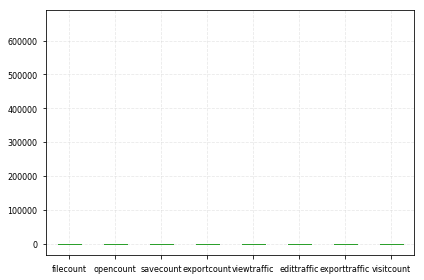

In [84]:
tf.plot(kind='box')

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

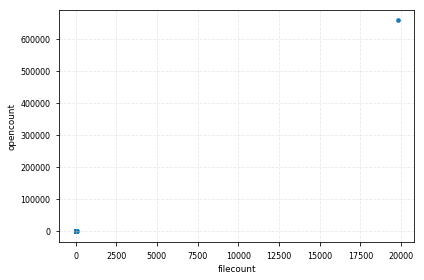

In [264]:
tf.plot(kind='scatter', x='filecount', y='opencount');

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

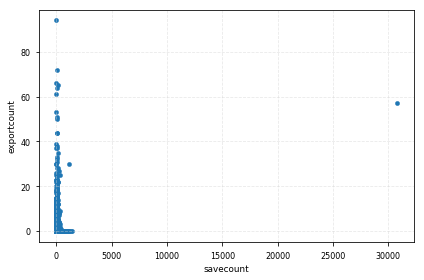

In [85]:
tf.plot(kind='scatter', x='savecount', y='exportcount');

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

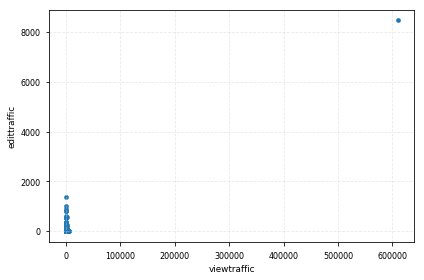

In [87]:
tf.plot(kind='scatter', x='viewtraffic', y='edittraffic');

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

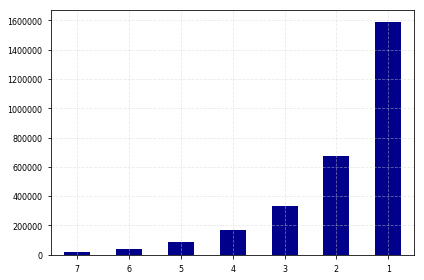

In [95]:
# 방문일수 분포 확인
tf['visitcount'].value_counts().sort_values().plot(kind='bar', color='darkblue', rot=0)

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

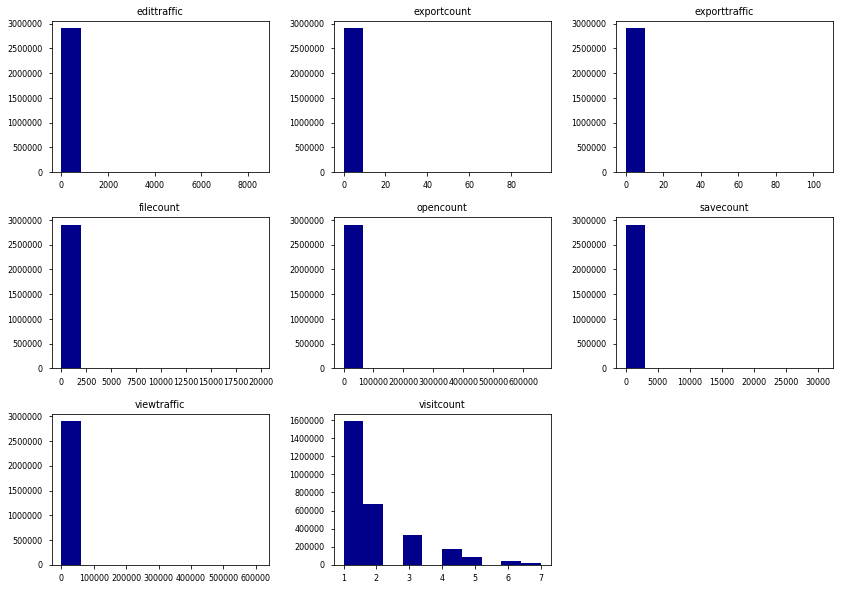

In [268]:
tf.hist(color='darkblue', figsize=(14,10), grid=False); 

In [96]:
# remove outliers
from scipy import stats

tf_zscore = tf[(np.abs(stats.zscore(tf)) < 3).all(axis=1)]

In [97]:
tf_zscore.describe().apply(lambda x: x.round(2))

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount
count,2841205.00,2841205.00,2841205.00,2841205.0,2841205.00,2841205.0,2841205.0,2841205.00
mean,2.27,5.27,0.37,0.0,4.89,0.1,0.0,1.76
std,1.73,7.93,1.98,0.0,16.38,0.8,0.0,1.06
min,1.00,1.00,0.00,0.0,-2.00,0.0,0.0,1.00
25%,1.00,1.00,0.00,0.0,0.00,0.0,0.0,1.00
50%,2.00,3.00,0.00,0.0,1.00,0.0,0.0,1.00
75%,3.00,6.00,0.00,0.0,4.00,0.0,0.0,2.00
max,25.00,1049.00,56.00,0.0,1073.00,16.0,0.0,5.00


In [98]:
def remove_outlier_std(df):
    for i in range(0, len(df.iloc[1])-1):
        df = df[~(np.abs(df.iloc[:,i] - df.iloc[:,i].mean()) > (3*df.iloc[:,i].std()))]
    return df

In [99]:
tf_std = remove_outlier_std(tf)

In [100]:
tf_std.describe().apply(lambda x: x.round(2))

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount
count,2781951.00,2781951.00,2781951.00,2781951.0,2781951.00,2781951.00,2781951.0,2781951.00
mean,2.27,4.78,0.23,0.0,3.44,0.03,0.0,1.78
std,1.75,5.33,0.87,0.0,7.03,0.21,0.0,1.13
min,1.00,1.00,0.00,0.0,-1.00,0.00,0.0,1.00
25%,1.00,1.00,0.00,0.0,0.00,0.00,0.0,1.00
50%,2.00,3.00,0.00,0.0,1.00,0.00,0.0,1.00
75%,3.00,6.00,0.00,0.0,3.00,0.00,0.0,2.00
max,22.00,36.00,9.00,0.0,53.00,3.00,0.0,7.00


In [107]:
tf_std.drop(['exportcount', 'exporttraffic'], axis=1, inplace=True)

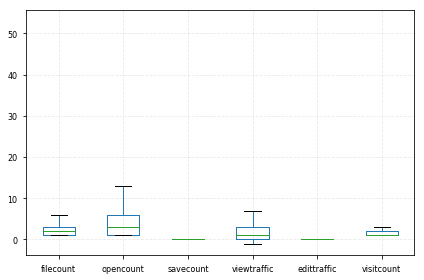

In [108]:
tf_std.plot(kind='box')

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [109]:
tf2 = tf_std.copy()

In [110]:
tf2.head()

,filecount,opencount,savecount,viewtraffic,edittraffic,visitcount
iduser,,,,,,
10100000000584,13,31,2,27,0,6
10100000001960,1,1,0,4,0,1
10100000011472,10,18,5,7,0,5
10100000014080,1,1,0,1,0,1
10100000018848,6,21,0,9,0,4


In [112]:
# 추가 변수 생성
tf2['file_per_visit'] = (tf2['filecount'] / tf2['visitcount']).round(1)
tf2['count_per_visit'] = ((tf2['opencount'] + tf2['savecount']) / tf2['visitcount']).round(1)
tf2['traffic_per_visit'] = ((tf2['viewtraffic'] + tf2['edittraffic']) / tf2['visitcount']).round(1)

In [113]:
tf2.head()

,filecount,opencount,savecount,viewtraffic,edittraffic,visitcount,file_per_visit,count_per_visit,traffic_per_visit
iduser,,,,,,,,,
10100000000584,13,31,2,27,0,6,2.2,5.5,4.5
10100000001960,1,1,0,4,0,1,1.0,1.0,4.0
10100000011472,10,18,5,7,0,5,2.0,4.6,1.4
10100000014080,1,1,0,1,0,1,1.0,1.0,1.0
10100000018848,6,21,0,9,0,4,1.5,5.2,2.2


In [114]:
tf2.describe().round(2)

,filecount,opencount,savecount,viewtraffic,edittraffic,visitcount,file_per_visit,count_per_visit,traffic_per_visit
count,2781951.00,2781951.00,2781951.00,2781951.00,2781951.00,2781951.00,2781951.00,2781951.00,2781951.00
mean,2.27,4.78,0.23,3.44,0.03,1.78,1.26,2.69,2.00
std,1.75,5.33,0.87,7.03,0.21,1.13,0.49,2.55,4.38
min,1.00,1.00,0.00,-1.00,0.00,1.00,1.00,1.00,0.00
25%,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00
50%,2.00,3.00,0.00,1.00,0.00,1.00,1.00,2.00,0.40
75%,3.00,6.00,0.00,3.00,0.00,2.00,1.40,3.00,2.00
max,22.00,36.00,9.00,53.00,3.00,7.00,15.00,44.00,56.00


In [115]:
tf2.query("viewtraffic < 0")

,filecount,opencount,savecount,viewtraffic,edittraffic,visitcount,file_per_visit,count_per_visit,traffic_per_visit
iduser,,,,,,,,,
10100038687543,1,1,2,-1,2,1,1.0,3.0,1.0


In [116]:
tf2.ix[10100038687543,'viewtraffic'] = np.nan

In [117]:
tf2 = tf2.fillna(tf2.mean())

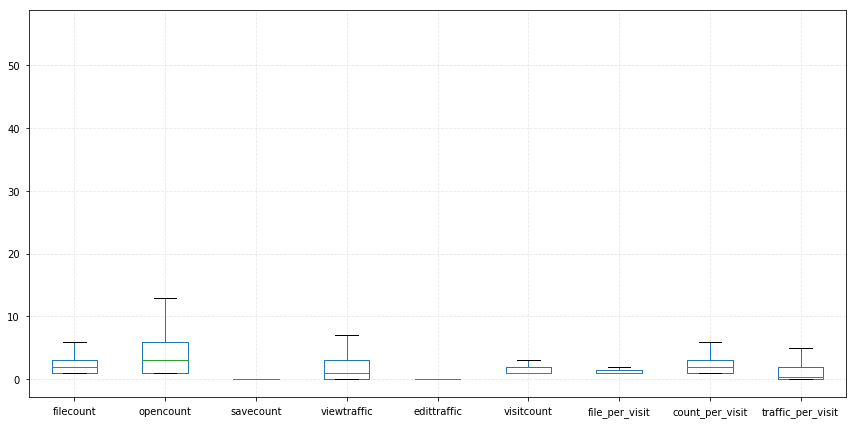

In [121]:
tf2.plot(kind='box', figsize=(12,6), fontsize=10)

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

### 두번째 데이터셋 조인
- 첫번째의 다음 주의 사용행동 데이터 => target variable(0, 1)

In [122]:
# 2ND week dataset
tf_2nd_wk = pd.read_csv("lc_2w.csv", index_col=0).set_index("iduser")

In [123]:
tf_2nd_wk.head()

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount
iduser,,,,,,,,
10100000000584,5,11,0,0,12821280,0,0,4
10100000059936,9,37,0,0,10818217,0,0,6
10100000314888,2,4,0,0,1707312,0,0,1
10100000348368,3,3,2,0,80678,8930,0,3
10100000538736,2,3,1,0,203776,101888,0,2


In [124]:
# retention 여부만 관심
tf_2nd_wk['flag'] = True

In [125]:
tf_2nd_wk.head()

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount,flag
iduser,,,,,,,,,
10100000000584,5,11,0,0,12821280,0,0,4,True
10100000059936,9,37,0,0,10818217,0,0,6,True
10100000314888,2,4,0,0,1707312,0,0,1,True
10100000348368,3,3,2,0,80678,8930,0,3,True
10100000538736,2,3,1,0,203776,101888,0,2,True


In [126]:
tf_2nd_wk['flag'].to_frame().head(10)

,flag
iduser,
10100000000584,True
10100000059936,True
10100000314888,True
10100000348368,True
10100000538736,True
10100001220336,True
10100001384088,True
10100003220648,True
10100003865288,True


In [128]:
# 첫째, 둘째주차 데이터 조인
tf3 = pd.merge(tf2, tf_2nd_wk['flag'].to_frame(), left_index=True, right_index=True, how='left').fillna(False)

In [129]:
tf3.head()

,filecount,opencount,savecount,viewtraffic,edittraffic,visitcount,file_per_visit,count_per_visit,traffic_per_visit,flag
iduser,,,,,,,,,,
10100000000584,13,31,2,27.0,0,6,2.2,5.5,4.5,True
10100000001960,1,1,0,4.0,0,1,1.0,1.0,4.0,False
10100000011472,10,18,5,7.0,0,5,2.0,4.6,1.4,True
10100000014080,1,1,0,1.0,0,1,1.0,1.0,1.0,False
10100000018848,6,21,0,9.0,0,4,1.5,5.2,2.2,True


In [131]:
tf3.flag.value_counts().to_frame().apply(lambda x: x/x.sum())

,flag
True,0.55102
False,0.44898


In [50]:
tf3.groupby("flag").mean()

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount,file_per_visit,count_per_visit,traffic_per_visit
flag,,,,,,,,,,,
False,1.721480,3.457589,0.224451,0.001755,2.838548,0.075780,0.000461,1.391324,1.231290,2.563520,2.101209
True,2.773115,6.153296,0.438990,0.002866,4.645270,0.120141,0.000779,2.127916,1.285033,2.977158,2.321621


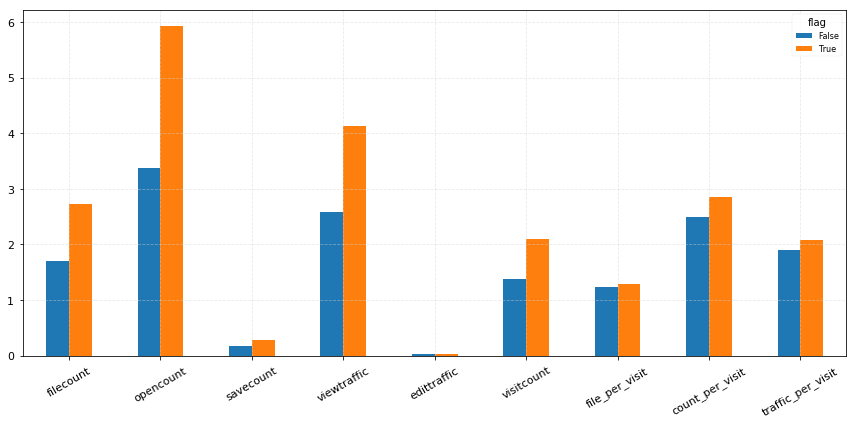

In [132]:
tf3.groupby("flag").mean().T.plot(kind='bar', figsize=(12,6), fontsize=11, rot=30);

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [133]:
tf3.groupby("flag").median()

,filecount,opencount,savecount,viewtraffic,edittraffic,visitcount,file_per_visit,count_per_visit,traffic_per_visit
flag,,,,,,,,,
False,1,2,0,0.0,0,1,1.0,2.0,0.0
True,2,4,0,1.0,0,2,1.0,2.0,0.5


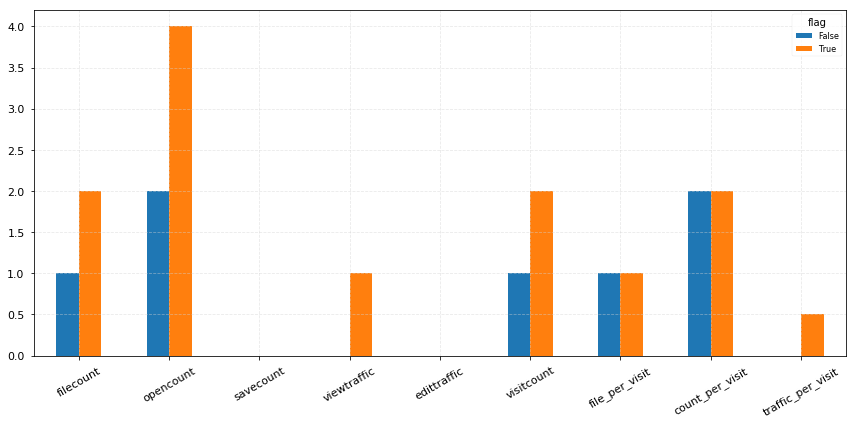

In [134]:
tf3.groupby("flag").median().T.plot(kind='bar', figsize=(12,6), fontsize=11, rot=30);

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

### T-test 통해 통계적으로 유의미한 변수 확인
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [135]:
tf3.head()

,filecount,opencount,savecount,viewtraffic,edittraffic,visitcount,file_per_visit,count_per_visit,traffic_per_visit,flag
iduser,,,,,,,,,,
10100000000584,13,31,2,27.0,0,6,2.2,5.5,4.5,True
10100000001960,1,1,0,4.0,0,1,1.0,1.0,4.0,False
10100000011472,10,18,5,7.0,0,5,2.0,4.6,1.4,True
10100000014080,1,1,0,1.0,0,1,1.0,1.0,1.0,False
10100000018848,6,21,0,9.0,0,4,1.5,5.2,2.2,True


In [136]:
from scipy.stats import ttest_ind

tf_churn = tf3[tf3['flag'] == 0]
tf_ret = tf3[tf3['flag'] == 1]

for i in range(0, 10):
    var1 = tf_churn.iloc[:,i]
    var2 = tf_ret.iloc[:,i]
    print(ttest_ind(var1, var2)) # only exportcount is not sig

Ttest_indResult(statistic=-501.99616949478434, pvalue=0.0)
Ttest_indResult(statistic=-408.06482155426977, pvalue=0.0)
Ttest_indResult(statistic=-100.08281591332018, pvalue=0.0)
Ttest_indResult(statistic=-183.1847562039435, pvalue=0.0)
Ttest_indResult(statistic=-38.945744861460106, pvalue=0.0)
Ttest_indResult(statistic=-551.4253102306836, pvalue=0.0)
Ttest_indResult(statistic=-87.05104872725092, pvalue=0.0)
Ttest_indResult(statistic=-119.65016750834118, pvalue=0.0)
Ttest_indResult(statistic=-31.559258335079075, pvalue=1.463454733276719e-218)
Ttest_indResult(statistic=-inf, pvalue=0.0)


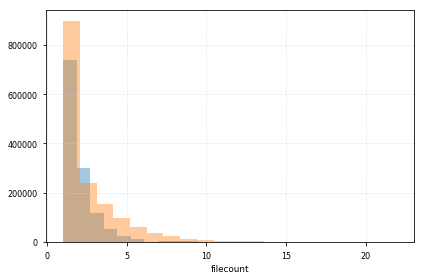

In [140]:
sns.distplot(tf_churn['filecount'], kde=False, bins=20)
sns.distplot(tf_ret['filecount'], kde=False, bins=20)

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

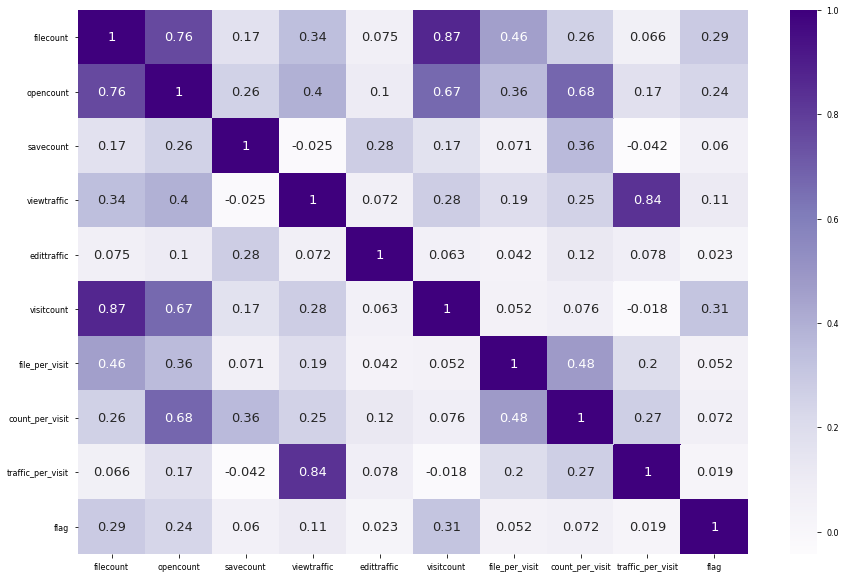

In [141]:
fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(tf3.corr(), annot=True, annot_kws={"size": 13}, cmap='Purples');

In [142]:
drop_cols = ['filecount', 'traffic_per_visit']

tf3.drop(drop_cols, axis=1, inplace=True)

### 2.3 변수별 영향력 도출

- 데이터 표준화 (scaling)
- 모델 학습 및 예측
- 로지스틱 회귀를 이용한 coefficient 도출
- 랜덤포레스트를 이용한 영향력 도출
- 반복적 변수 제거 방식(RFE)을 이용한 변수별 중요도 도출

In [143]:
tf3['flag'] = np.where(tf3.flag == True, 1, 0)

In [144]:
tf3.flag.value_counts()

1    1532910
0    1249041
Name: flag, dtype: int64

In [145]:
from sklearn.model_selection import train_test_split

X = tf3.drop("flag", axis=1)
y = tf3.flag

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [146]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2086463, 7)
(2086463,)
(695488, 7)
(695488,)


In [147]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

def pipeline_logit(X_train, y_train):

    scaler = StandardScaler()
    select = SelectKBest(score_func=f_classif)
    logit_model = LogisticRegression()

    pipe = Pipeline([('scaler', scaler), ('feature_selection', select), ('model', logit_model)])

    param_grid = [{'feature_selection__k': [5, 'all'],
                   'model__C': [0.01, 0.1, 1],
                   'model__penalty': ['l1', 'l2']}]

    grid_search = GridSearchCV(pipe, param_grid, cv=2)
    grid_search.fit(X_train, y_train)
    
    return grid_search

In [148]:
grid_search = pipeline_logit(X_train, y_train)

In [149]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

def model_evaluation(grid, X_test, y_test):
    
    print(classification_report(grid.predict(X_test), y_test))
    print("")
    print("best score: ", grid.best_score_)
    print("best params: ", grid.best_params_)

    fpr, tpr, thresholds = roc_curve(y_test, grid.predict(X_test))
    roc_auc = auc(fpr, tpr)
    
    return roc_auc

In [150]:
model_evaluation(grid_search, X_test, y_test)

              precision    recall  f1-score   support

           0       0.71      0.58      0.64    381182
           1       0.58      0.71      0.64    314306

   micro avg       0.64      0.64      0.64    695488
   macro avg       0.64      0.64      0.64    695488
weighted avg       0.65      0.64      0.64    695488


best score:  0.6363084320210807
best params:  {'feature_selection__k': 5, 'model__C': 0.01, 'model__penalty': 'l2'}


0.6440798783805785

Text(0.5, 0, 'False Positive Rate')

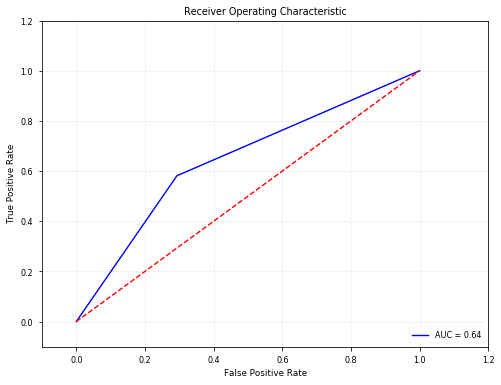

In [151]:
# ROC plot
fig = plt.figure(figsize=(8,6))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, grid_search.predict(X_test))
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [152]:
mask = grid_search.best_estimator_.named_steps['feature_selection'].get_support().tolist()

mask

[True, True, True, False, True, False, True]

In [153]:
features_list = list(X_train.columns.values)

features_list

['opencount',
 'savecount',
 'viewtraffic',
 'edittraffic',
 'visitcount',
 'file_per_visit',
 'count_per_visit']

In [154]:
selected_features = []

for bool, features in zip(mask, features_list):
    if bool:
        selected_features.append(features)

In [155]:
selected_features

['opencount', 'savecount', 'viewtraffic', 'visitcount', 'count_per_visit']

In [156]:
feature_importance = grid_search.best_estimator_.named_steps['model'].coef_.ravel().tolist()

feature_importance

[0.03787078026691681,
 -0.01716750087639559,
 0.026595149700793113,
 0.7928793370416518,
 0.07855479415767362]

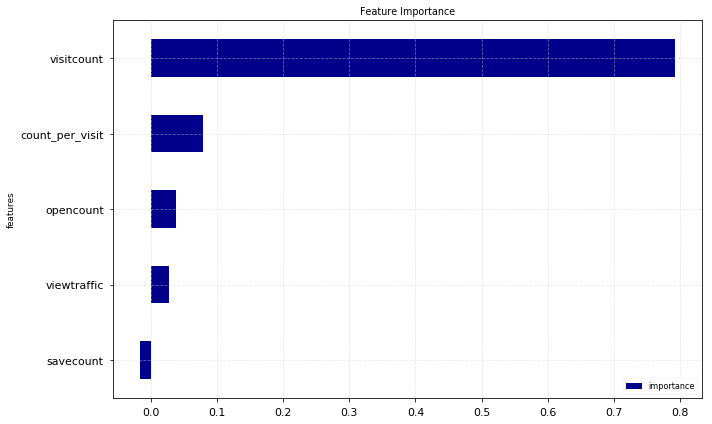

In [157]:
# create a df       
feature_importance_pd = pd.DataFrame(list(zip(selected_features, feature_importance)),\
                                    columns=['features', 'importance'])\
                          .set_index("features").sort_values("importance")

feature_importance_pd.plot(kind='barh', color='darkblue', figsize=(10,6), fontsize=11);

plt.title("Feature Importance")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [158]:
## Tree-based feature importance
from sklearn.ensemble import ExtraTreesClassifier

def pipeline_tree_kbest(X_train, y_train):

    select = SelectKBest()
    extra_tree_model = ExtraTreesClassifier()

    pipe = Pipeline([('feature_selection', select), ('model', extra_tree_model)])

    param_grid = [{'feature_selection__k': [5, 'all'],
                   'model__max_depth': [4, 10], # max_depth: The maximum depth of the tree.
                   'model__n_estimators': [10, 20], # n_estimators: The number of trees in the forest.
                   'model__min_samples_split': [50, 100]}]

    grid_search = GridSearchCV(pipe, param_grid, cv=2)
    grid_search.fit(X_train, y_train)
    
    return grid_search

In [159]:
grid_search_tree = pipeline_tree_kbest(X_train, y_train)

In [160]:
model_evaluation(grid_search_tree, X_test, y_test)

              precision    recall  f1-score   support

           0       0.70      0.58      0.64    379067
           1       0.58      0.71      0.64    316421

   micro avg       0.64      0.64      0.64    695488
   macro avg       0.64      0.64      0.64    695488
weighted avg       0.65      0.64      0.64    695488


best score:  0.6365279422640133
best params:  {'feature_selection__k': 5, 'model__max_depth': 10, 'model__min_samples_split': 100, 'model__n_estimators': 20}


0.6439918349353377

Text(0.5, 0, 'False Positive Rate')

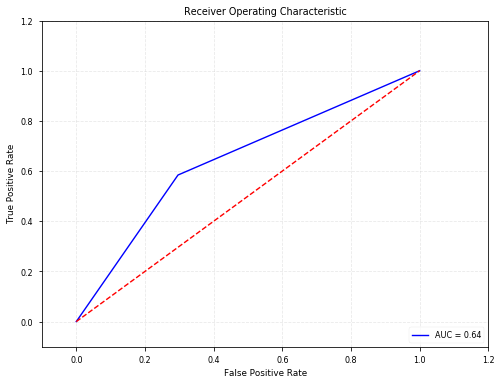

In [161]:
# ROC plot
fig = plt.figure(figsize=(8,6))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, grid_search_tree.predict(X_test))
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [162]:
mask = grid_search_tree.best_estimator_.named_steps['feature_selection'].get_support()
feature_importance = grid_search_tree.best_estimator_.named_steps['model'].feature_importances_

features_list = list(X_train.columns.values)

selected_features = []
for bool, features in zip(mask, features_list):
    if bool:
        selected_features.append(features)

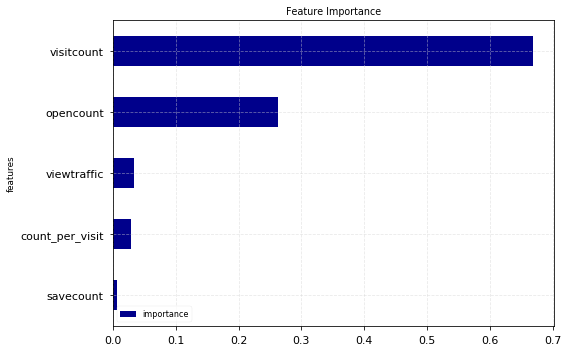

In [163]:
feature_importance_pd = pd.DataFrame(list(zip(selected_features, feature_importance)),\
                                    columns=['features', 'importance'])\
                          .set_index("features").sort_values("importance")

feature_importance_pd.plot(kind='barh', color='darkblue', figsize=(8,5), fontsize=11);

plt.title("Feature Importance")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

### Note
- **Key variable: visitcount**

### 2.4 그룹별 리텐션 여부 데이터셋
- 주요 변수 1개만 선정: **visitcount** (range: 1~7)
- group: 유저의 visitcount 기준으로 그룹 부여
    - 만약 특정주에 1일 들어왔으면, group = 1
- isnextvisit: 다음주의 재방문 여부
    - 0: 방문 안함
    - 1: 방문함
- day: group 산정일 기준
    - day 의 날짜 이전 일주일간의 데이터로 group 산정

In [167]:
sf = pd.read_csv("df_lc.csv", index_col=0)

In [51]:
# group = visitcount
sf.head(10)

,group,isnextvisit,day
0,1,0,2016-10-15
1,1,0,2016-10-15
2,2,1,2016-10-15
3,2,1,2016-10-15
4,1,0,2016-10-15
5,2,1,2016-10-15
6,2,0,2016-10-15
7,1,0,2016-10-15
8,2,0,2016-10-15
9,1,1,2016-10-15


In [168]:
sf.tail()

,group,isnextvisit,day
9420542,1,0,2016-10-19
9420543,1,1,2016-10-19
9420544,2,1,2016-10-19
9420545,3,0,2016-10-19
9420546,1,0,2016-10-19


In [169]:
sf.shape

(9420547, 3)

In [170]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9420547 entries, 0 to 9420546
Data columns (total 3 columns):
group          int64
isnextvisit    int64
day            object
dtypes: int64(2), object(1)
memory usage: 287.5+ MB


In [171]:
sf['day'] = pd.to_datetime(sf['day'])

In [172]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9420547 entries, 0 to 9420546
Data columns (total 3 columns):
group          int64
isnextvisit    int64
day            datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 287.5 MB


In [173]:
sf.day.value_counts().sort_index()

2016-09-27    296079
2016-09-28    299358
2016-09-29    301737
2016-09-30    304003
2016-10-01    302862
2016-10-02    302628
2016-10-03    302787
2016-10-04    302598
2016-10-05    302986
2016-10-06    301461
               ...  
2016-10-17    323232
2016-10-18    326945
2016-10-19    330996
2016-10-20    334786
2016-10-21    338143
2016-10-22    340399
2016-10-23    338552
2016-10-24    337666
2016-10-25    336850
2016-10-26    337398
Name: day, Length: 30, dtype: int64

In [176]:
# 그룹별 리텐션 비율
sf_ret = sf.groupby(['group', 'isnextvisit']).size().unstack()
sf_ret.columns = ['churn', 'retention']

sf_ret

,churn,retention
group,,
1,3465785,2118215
2,705404,1255567
3,209120,742073
4,63628,429373
5,18131,239102
6,4593,118940
7,876,49740


In [180]:
# FQ7 index
sf_ret_rt = sf_ret.apply(lambda x: x/x.sum() * 100, axis=1).round(2).reset_index()

sf_ret_rt

,group,churn,retention
0,1,62.07,37.93
1,2,35.97,64.03
2,3,21.99,78.01
3,4,12.91,87.09
4,5,7.05,92.95
5,6,3.72,96.28
6,7,1.73,98.27


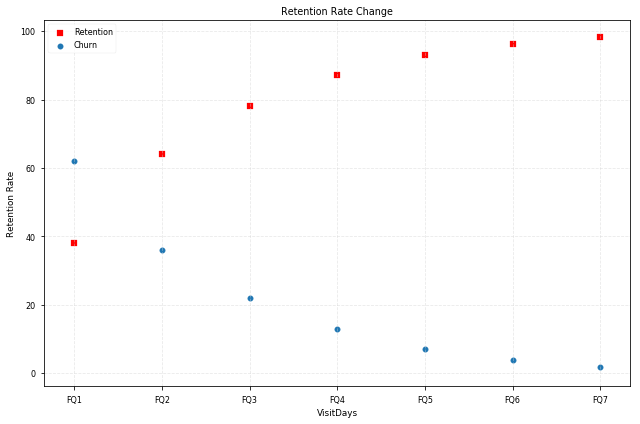

In [182]:
fig, ax = plt.subplots(figsize=(9,6))

plt.scatter(sf_ret_rt.group, sf_ret_rt.retention, color='r', label="Retention", marker=',')
plt.scatter(sf_ret_rt.group, sf_ret_rt.churn, label="Churn")

plt.title("Retention Rate Change")
plt.ylabel("Retention Rate")
plt.xlabel("VisitDays")
plt.xticks([1,2,3,4,5,6,7], ['FQ1', 'FQ2', 'FQ3', 'FQ4', 'FQ5', 'FQ6', 'FQ7'])
plt.legend()
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

- Note 
 - FQ4 is the cut-line as saturated

## 3. 스코어 산출 및 대시보드 구축

- Logistic regression에서 변수별 coefficient 활용 ✓
    - reference: http://blog.yhat.com/posts/logistic-regression-and-python.html
    - another option: Random Forest's Feature Importance
<img src="kui_frame.png" width="650">    

### 3.1 변수별 영향력 산출

In [183]:
sf.head(10)

,group,isnextvisit,day
0,1,0,2016-10-15
1,1,0,2016-10-15
2,2,1,2016-10-15
3,2,1,2016-10-15
4,1,0,2016-10-15
5,2,1,2016-10-15
6,2,0,2016-10-15
7,1,0,2016-10-15
8,2,0,2016-10-15
9,1,1,2016-10-15


In [184]:
sf.day.value_counts().sort_index()

2016-09-27    296079
2016-09-28    299358
2016-09-29    301737
2016-09-30    304003
2016-10-01    302862
2016-10-02    302628
2016-10-03    302787
2016-10-04    302598
2016-10-05    302986
2016-10-06    301461
               ...  
2016-10-17    323232
2016-10-18    326945
2016-10-19    330996
2016-10-20    334786
2016-10-21    338143
2016-10-22    340399
2016-10-23    338552
2016-10-24    337666
2016-10-25    336850
2016-10-26    337398
Name: day, Length: 30, dtype: int64

In [185]:
# 하루치 데이터로 베타값 산출 시도
# 특정 하루의 데이터셋만 가지고 회귀분석

firstday = '2016-09-27'
sf_firstday = sf[sf['day'] == firstday].drop('day', axis=1)

sf_firstday.head()

,group,isnextvisit
7885260,1,1
7885261,1,1
7885262,4,1
7885263,1,0
7885264,1,1


In [186]:
sf_firstday.groupby(["group", "isnextvisit"]).size().unstack().apply(lambda x: x/x.sum() * 100, axis=1).round(2)

isnextvisit,0,1
group,,
1,62.64,37.36
2,34.94,65.06
3,21.40,78.60
4,12.32,87.68
5,6.83,93.17
6,3.54,96.46
7,2.17,97.83


In [187]:
sf_firstday_dum = pd.get_dummies(sf_firstday['group'], prefix='FQ').join(sf_firstday.isnextvisit)

In [188]:
sf_firstday_dum.head()

,FQ_1,FQ_2,FQ_3,FQ_4,FQ_5,FQ_6,FQ_7,isnextvisit
7885260,1,0,0,0,0,0,0,1
7885261,1,0,0,0,0,0,0,1
7885262,0,0,0,1,0,0,0,1
7885263,1,0,0,0,0,0,0,0
7885264,1,0,0,0,0,0,0,1


In [189]:
# to check p-values via statsmodel
from sklearn.model_selection import train_test_split

sf_firstday_dum['intercept'] = 1.0

X = sf_firstday_dum.drop(['isnextvisit', 'FQ_1'], axis=1)
y = sf_firstday_dum.isnextvisit

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [190]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(222059, 7)
(222059,)
(74020, 7)
(74020,)


In [191]:
import statsmodels.api as sm

logreg_sm = sm.Logit(y_train, X_train)
result = logreg_sm.fit()

Optimization terminated successfully.
         Current function value: 0.612716
         Iterations 8


In [192]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            isnextvisit   No. Observations:               222059
Model:                          Logit   Df Residuals:                   222052
Method:                           MLE   Df Model:                            6
Date:                Wed, 29 May 2019   Pseudo R-squ.:                  0.1156
Time:                        16:13:44   Log-Likelihood:            -1.3606e+05
converged:                       True   LL-Null:                   -1.5384e+05
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
FQ_2           1.1503      0.011    101.237      0.000       1.128       1.173
FQ_3           1.8295      0.018    101.750      0.000       1.794       1.865
FQ_4           2.4906      0.031     80.888      0.000       2.430       2.551
FQ_5           3.1355      0.055     56.654      0.000       3.027       3.244
FQ_6           3.8476      0.107     36.011      0.000       3.638       4.057
FQ_7           4.3369      0.206     21.008      0.000       3.932       4.741
intercept     -0.5228      0.006    -93.762      0.000      -0.534      -0.512
==============================================================================
"""

In [196]:
sf.head()

,group,isnextvisit,day
0,1,0,2016-10-15
1,1,0,2016-10-15
2,2,1,2016-10-15
3,2,1,2016-10-15
4,1,0,2016-10-15


In [194]:
## 하루가 아니라 여러날의 데이터를 모두 고려
# 가중치(coeffienct) 평균 산출하기

sf1 = pd.get_dummies(sf.group, prefix='FQ')\
                 .join(sf.isnextvisit)\
                 .join(sf.day)\
                 .drop("FQ_1", axis=1)

In [199]:
sf1.head()

,FQ_2,FQ_3,FQ_4,FQ_5,FQ_6,FQ_7,isnextvisit,day
0,0,0,0,0,0,0,0,2016-10-15
1,0,0,0,0,0,0,0,2016-10-15
2,1,0,0,0,0,0,1,2016-10-15
3,1,0,0,0,0,0,1,2016-10-15
4,0,0,0,0,0,0,0,2016-10-15


In [200]:
from sklearn.linear_model import LogisticRegression
from datetime import timedelta

dates = pd.to_datetime('2016-09-27')

for i in range(0, sf1['day'].nunique()):
    subset = sf1[sf1['day'] == dates]
    subset['intercept'] = 1.0

    X = subset.drop(['isnextvisit', 'day'], axis=1)
    y = subset.isnextvisit

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    logreg = LogisticRegression().fit(X_train, y_train)
  
    print("date :", dates, "score :", logreg.score(X_test, y_test))
    print(logreg.coef_.flatten())

    dates = dates + timedelta(days=1)

date : 2016-09-27 00:00:00 score : 0.6667116995406647
[ 1.14963659  1.82841734  2.4877845   3.1253363   3.80499695  4.17151622
 -0.26115845]
date : 2016-09-28 00:00:00 score : 0.6728621058257617
[ 1.10798592  1.85231273  2.48041052  3.19144057  3.54883648  4.47880009
 -0.26112489]
date : 2016-09-29 00:00:00 score : 0.671995757937297
[ 1.10231799  1.82559434  2.42972546  3.09422902  3.52102689  4.05366465
 -0.2646706 ]
date : 2016-09-30 00:00:00 score : 0.6736490309338035
[ 1.09299121  1.77574097  2.41794788  2.93136176  3.60716201  4.06808012
 -0.27235774]
date : 2016-10-01 00:00:00 score : 0.6729885361086164
[ 1.07056828  1.75500228  2.37116325  2.99266394  3.69091898  4.27376316
 -0.26307295]
date : 2016-10-02 00:00:00 score : 0.6693233937375259
[ 1.06372421  1.78621774  2.35227393  3.04072934  3.7988393   4.6726745
 -0.27000216]
date : 2016-10-03 00:00:00 score : 0.670356817311122
[ 1.04276142  1.71305839  2.34037472  3.06953076  3.64169817  4.10260013
 -0.2604437 ]
date : 2016-10-0

In [202]:
from datetime import timedelta

dates = pd.to_datetime('2016-09-27')

score = []
beta = pd.DataFrame()

for i in range(0, sf1['day'].nunique()):
    subset = sf1[sf1['day'] == dates]
    subset['intercept'] = 1.0

    X = subset.drop(['isnextvisit', 'day'], axis=1)
    y = subset.isnextvisit

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    logreg = LogisticRegression().fit(X_train, y_train)
  
    score.append(logreg.score(X_test, y_test))
    beta = beta.append(pd.DataFrame(logreg.coef_))

    dates = dates + timedelta(days=1)

In [204]:
score

[0.6667116995406647,
 0.6728621058257617,
 0.671995757937297,
 0.6736490309338035,
 0.6729885361086164,
 0.6693233937375259,
 0.670356817311122,
 0.6690152015862525,
 0.668000052807372,
 0.6679139134357668,
 0.6648477543938651,
 0.6671115927472644,
 0.6661186373799816,
 0.6612389474101584,
 0.6622039810128242,
 0.6631351492928235,
 0.6618968733287244,
 0.6562047697904578,
 0.6586237712243074,
 0.6652482089324729,
 0.6672235422235422,
 0.6681062431946364,
 0.6720564598967963,
 0.6741938181774735,
 0.6772144411848207,
 0.6777790834312574,
 0.6759375221531699,
 0.6753260599168414,
 0.6721408808616247,
 0.6737759336099585]

In [203]:
print(np.array(score).mean())

0.6687733393129062


In [206]:
beta.head()

,0,1,2,3,4,5,6
0,1.149637,1.828417,2.487785,3.125336,3.804997,4.171516,-0.261158
0,1.107986,1.852313,2.480411,3.191441,3.548836,4.478800,-0.261125
0,1.102318,1.825594,2.429725,3.094229,3.521027,4.053665,-0.264671
0,1.092991,1.775741,2.417948,2.931362,3.607162,4.068080,-0.272358
0,1.070568,1.755002,2.371163,2.992664,3.690919,4.273763,-0.263073


In [207]:
coef_df = beta.reset_index(drop=True)
coef_df.columns = X_train.columns

coef_df.index = sf1.day.unique()
coef_df.sort_index(inplace=True)

coef_df

,FQ_2,FQ_3,FQ_4,FQ_5,FQ_6,FQ_7,intercept
2016-09-27,1.140718,1.834486,2.498594,3.126238,3.561644,4.764162,-0.294165
2016-09-28,1.025078,1.728080,2.375799,3.032638,3.721353,4.314973,-0.195709
2016-09-29,1.061960,1.725731,2.363979,3.052513,3.992920,4.472025,-0.209637
2016-09-30,1.107986,1.852313,2.480411,3.191441,3.548836,4.478800,-0.261125
2016-10-01,1.015375,1.673153,2.345939,2.957879,3.555077,4.279253,-0.187977
2016-10-02,1.128777,1.812410,2.449759,3.198238,3.825787,4.437341,-0.283999
2016-10-03,1.036459,1.714198,2.408326,3.149775,3.853859,4.719431,-0.203249
2016-10-04,1.112237,1.798565,2.444420,3.132133,3.744691,4.454829,-0.278012
2016-10-05,1.101738,1.771492,2.396188,3.147727,3.834786,4.130423,-0.271084
2016-10-06,1.062912,1.735139,2.413277,3.087629,3.669900,4.488344,-0.244189


In [208]:
# cofficient value
coef_df.mean()

FQ_2         1.066428
FQ_3         1.755756
FQ_4         2.398918
FQ_5         3.068911
FQ_6         3.715177
FQ_7         4.386283
intercept   -0.245137
dtype: float64

In [126]:
# odd ratio
np.exp(coef_df.mean())

FQ_2          2.904983
FQ_3          5.787819
FQ_4         11.011261
FQ_5         21.518462
FQ_6         41.065852
FQ_7         80.341245
intercept     0.782598
dtype: float64

###  3.2 변수별 가중치 반영하여 스코어 산출

In [209]:
sf.head()

,group,isnextvisit,day
0,1,0,2016-10-15
1,1,0,2016-10-15
2,2,1,2016-10-15
3,2,1,2016-10-15
4,1,0,2016-10-15


In [210]:
daily_score = sf.groupby(['day', 'group']).size().unstack()

daily_score.head()

group,1,2,3,4,5,6,7
day,,,,,,,
2016-09-27,183357,59988,27280,13607,6922,3450,1475
2016-09-28,182610,61218,29023,14150,7196,3649,1512
2016-09-29,181451,61859,29978,15378,7747,3748,1576
2016-09-30,179801,62871,30457,16118,8839,4139,1778
2016-10-01,178675,62491,30691,16158,8759,4389,1699


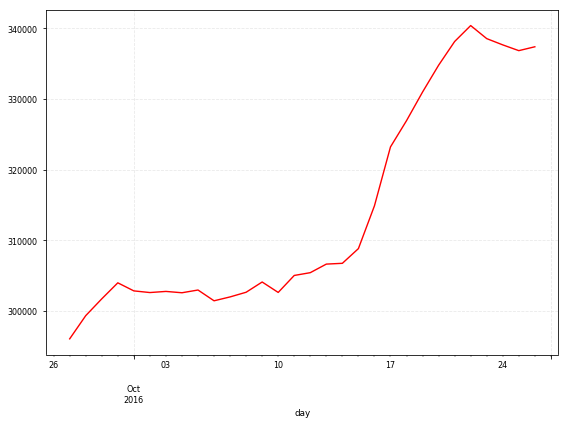

In [211]:
# without weights
daily_score.sum(axis=1).plot(color='red', figsize=(8,6));

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [227]:
daily_score.ix['2016-10-10':,]

group,1,2,3,4,5,6,7
day,,,,,,,
2016-10-10,177793,63913,31218,16193,8059,3909,1558
2016-10-11,178206,65169,31572,16273,8297,3928,1601
2016-10-12,178669,65118,31619,16246,8306,3864,1618
2016-10-13,178697,65523,31941,16336,8336,4110,1709
2016-10-14,178428,65351,32111,16823,8433,3983,1634
2016-10-15,179936,65443,32261,16766,8685,4082,1670
2016-10-16,183947,66638,32462,17229,8730,4244,1645
2016-10-17,189154,68315,33269,17228,9170,4327,1769
2016-10-18,193667,68182,33317,16954,8919,4211,1695


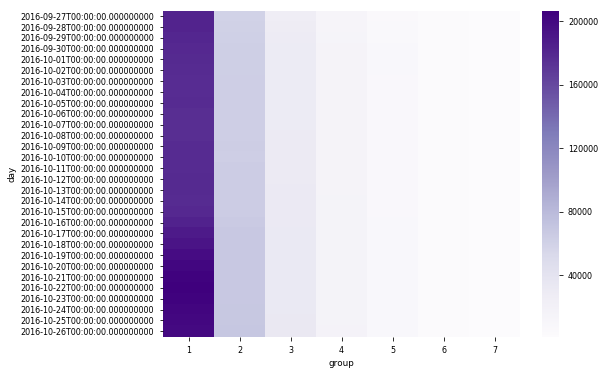

In [212]:
fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(daily_score, annot=False, cmap='Purples');

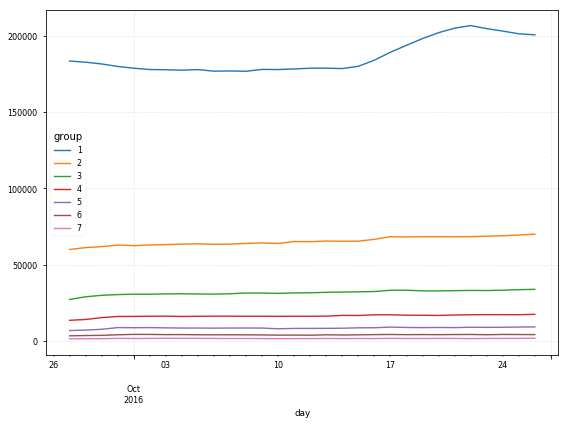

In [213]:
# without weights => bar, stacked=True
daily_score.plot(figsize=(8,6));

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [214]:
# odd ratio
np.exp(coef_df.mean())

FQ_2          2.904983
FQ_3          5.787819
FQ_4         11.011261
FQ_5         21.518462
FQ_6         41.065852
FQ_7         80.341245
intercept     0.782598
dtype: float64

In [215]:
weight = [x for x in np.exp(coef_df.mean())][:-1]
weight.insert(0, 1.0)

weight

[1.0,
 2.9049834512115025,
 5.7878190785213715,
 11.01126112306894,
 21.518461794862137,
 41.065852151069144,
 80.34124466840365]

In [216]:
daily_score_weight = daily_score.copy()

In [217]:
for i in range(1, 7):
    daily_score_weight.iloc[:, i] = (daily_score_weight.iloc[:, i] * weight[i-0]).apply(lambda x: round(x, 2))

In [218]:
daily_score_weight.head()

group,1,2,3,4,5,6,7
day,,,,,,,
2016-09-27,183357,174264.15,157891.70,149830.23,148950.79,141677.19,118503.34
2016-09-28,182610,177837.28,167979.87,155809.34,154846.85,149849.29,121475.96
2016-09-29,181451,179699.37,173507.24,169331.17,166703.52,153914.81,126617.80
2016-09-30,179801,182639.21,176279.61,177479.51,190201.68,169971.56,142846.73
2016-10-01,178675,181535.32,177633.96,177919.96,188480.21,180238.03,136499.77


In [219]:
daily_score_weight['kui'] = daily_score_weight.sum(axis=1)

In [221]:
daily_score_weight.head()

group,1,2,3,4,5,6,7,kui
day,,,,,,,,
2016-09-27,183357,174264.15,157891.70,149830.23,148950.79,141677.19,118503.34,1074474.40
2016-09-28,182610,177837.28,167979.87,155809.34,154846.85,149849.29,121475.96,1110408.59
2016-09-29,181451,179699.37,173507.24,169331.17,166703.52,153914.81,126617.80,1151224.91
2016-09-30,179801,182639.21,176279.61,177479.51,190201.68,169971.56,142846.73,1219219.30
2016-10-01,178675,181535.32,177633.96,177919.96,188480.21,180238.03,136499.77,1220982.25


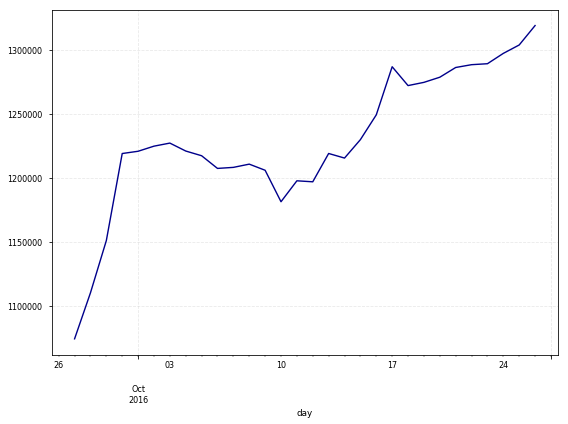

In [233]:
daily_score_weight['kui'].plot(figsize=(8,6), color='darkblue')

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

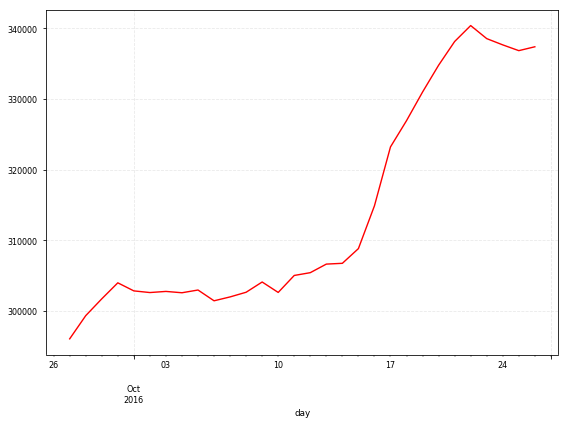

In [235]:
daily_score.sum(axis=1).plot(color='red', figsize=(8,6));

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [231]:
daily_score_weight.ix['2016-10-10':,]

group,1,2,3,4,5,6,7,kui
day,,,,,,,,
2016-10-10,177793,185666.21,180684.14,178305.35,173417.28,160526.42,125171.66,1181564.06
2016-10-11,178206,189314.87,182733.02,179186.25,178538.68,161306.67,128626.33,1197911.82
2016-10-12,178669,189166.71,183005.05,178888.95,178732.34,158678.45,129992.13,1197132.63
2016-10-13,178697,190343.23,184868.73,179879.96,179377.90,168780.65,137303.19,1219250.66
2016-10-14,178428,189843.57,185852.66,185242.45,181465.19,163565.29,131277.59,1215674.75
2016-10-15,179936,190110.83,186720.83,184614.80,186887.84,167630.81,134169.88,1230070.99
2016-10-16,183947,193582.29,187884.18,189713.02,187856.17,174283.48,132161.35,1249427.49
2016-10-17,189154,198453.94,192554.95,189702.01,197324.29,177691.94,142123.66,1287004.79
2016-10-18,193667,198067.58,192832.77,186684.92,191923.16,172928.30,136178.41,1272282.14


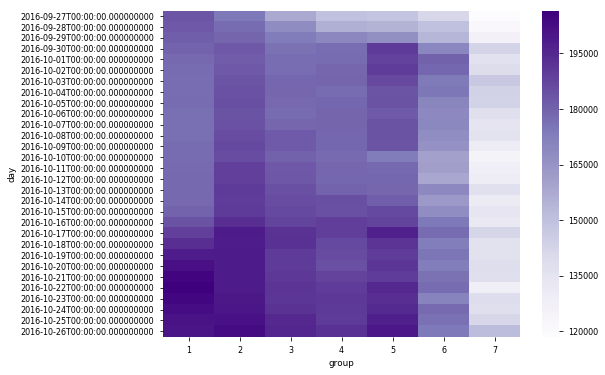

In [229]:
fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(daily_score_weight.drop("kui", axis=1), annot=False, cmap='Purples');

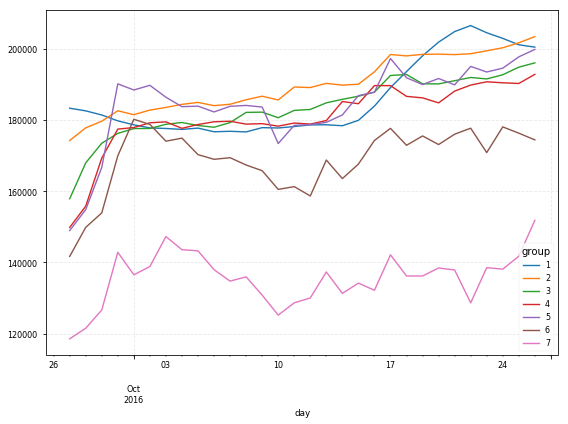

In [230]:
daily_score_weight.drop('kui', axis=1).plot(figsize=(8,6));

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

- Reference
    - http://blog.yhat.com/posts/logistic-regression-and-python.html
    - http://www.appstate.edu/~whiteheadjc/service/logit/intro.htm
    - http://www.cbgstat.com/method_logistic_regression_analysis/logistic_regression_analysis.php

### 3.3 Dashboard 생성
 - Redash: https://redash.io/
 - plotly: https://plot.ly/feed/#/
     - line chart example: https://plot.ly/python/line-charts/
 - creat a dashboard: https://plot.ly/create/

In [ ]:
daily_score_odd.to_csv('daily_score.csv')